In [1]:

from tnia.deconvolution.forward import forward
from tnia.plotting.projections import show_xyz_slice, show_xyz_max
import raster_geometry as rg
from tnia.simulation.phantoms import add_small_to_large
import numpy as np

# Create simulated image

Draw a phantom made of points and/or spheres.  The options are endless but right now options are 

1.  A point in the center
2.  A sphere of radius r in the center. 
3.  A grid of spheres of different radii and intensity centered axially in a 3D image space. 

Use gain and background to control SNR (high gain and/or background = higher SNR)

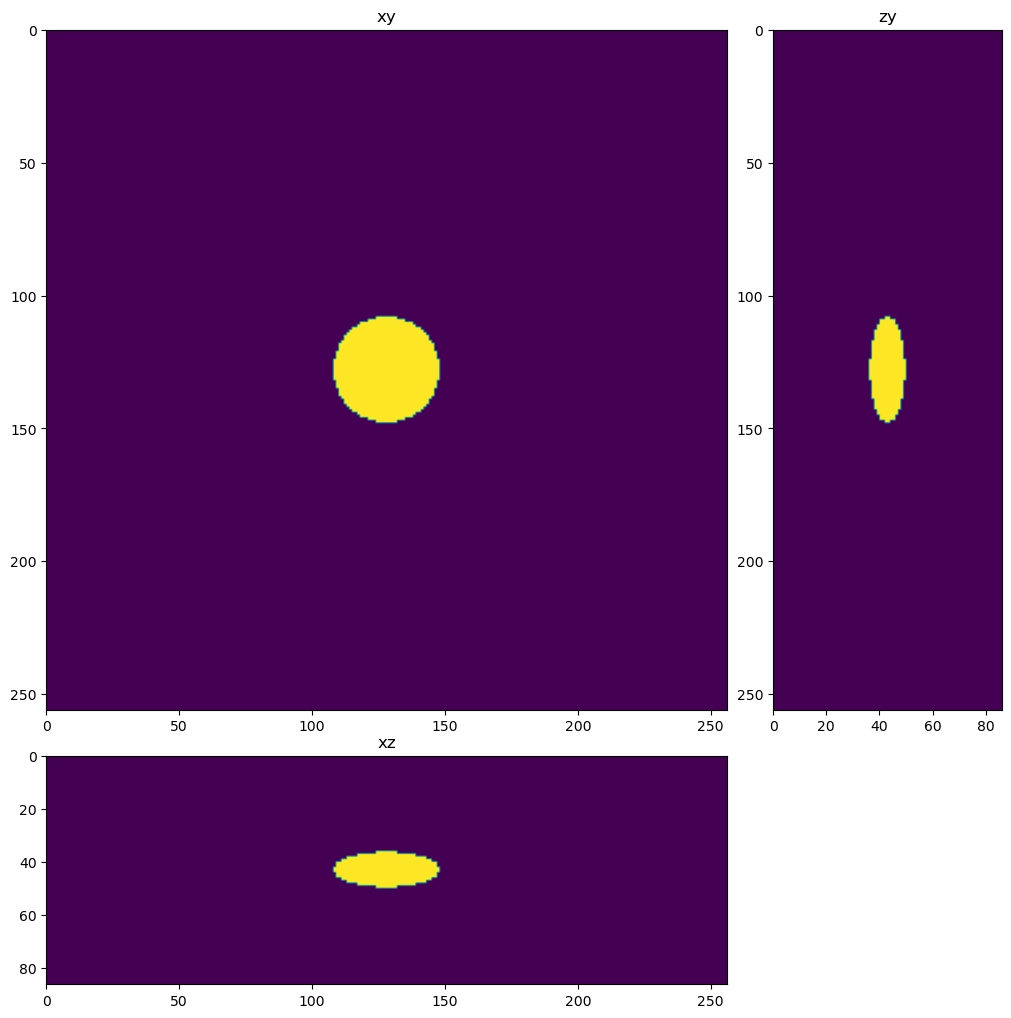

In [19]:

gain = 100
background = 0 

zdim = 256
ydim = 256
xdim = 256

phantom = np.zeros((zdim,ydim,xdim), dtype=np.float32)

depth = zdim//2

r = 20
size = [2*r, 2*r, 2*r]
sphere = rg.sphere(size, r).astype(np.float32)
add_small_to_large(phantom, gain*100*sphere, xdim//2, ydim//2, zdim//2)

phantom=phantom[::3,:,:]

fig = show_xyz_max(phantom)



## Create a PSF

PSF is twice as big as image to avoid 'block' artifacts and make sure we simulate light propagating though the entire image. 

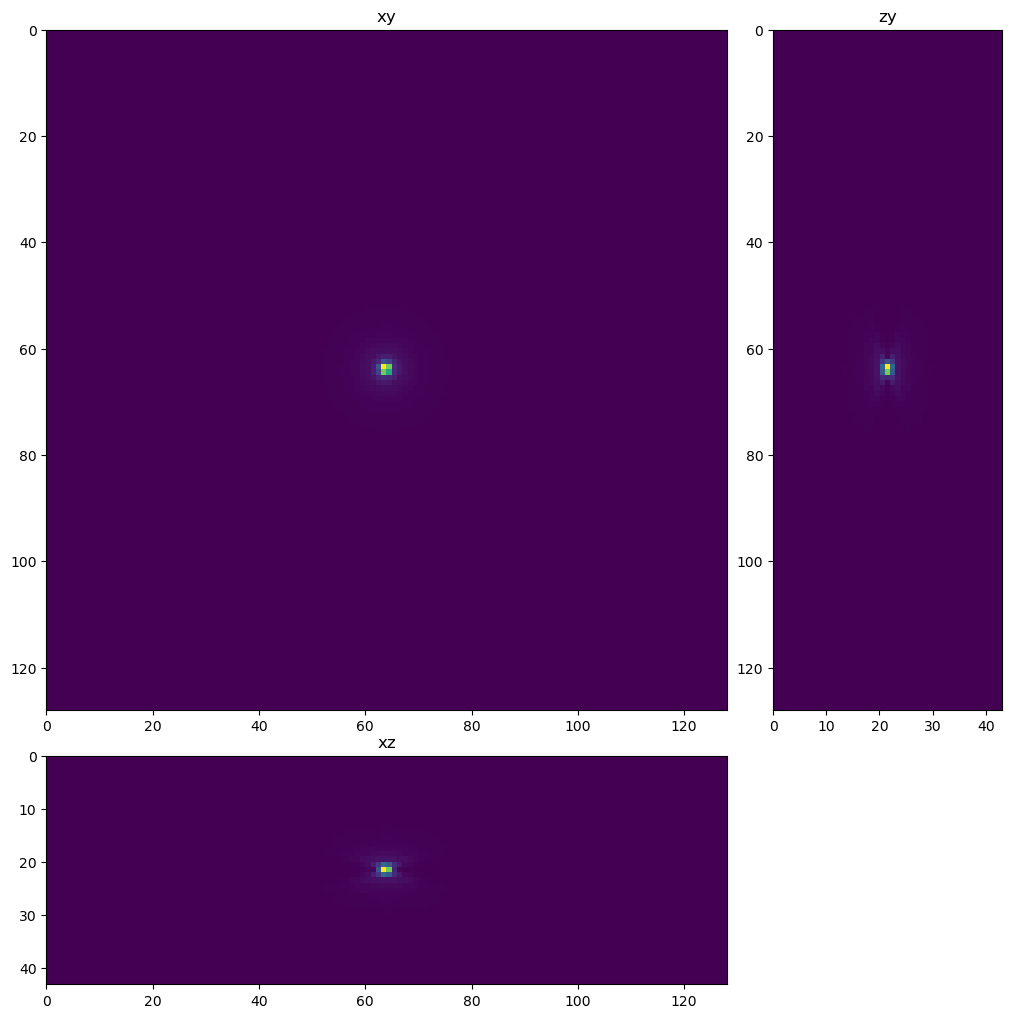

In [31]:
from tnia.deconvolution.psfs import gibson_lanni_3D

x_voxel_size = 0.1
z_voxel_size=0.3

sxy = 1
sz = z_voxel_size/x_voxel_size

xy_psf_dim=xdim//2
z_psf_dim=im.shape[0]//2

NA=1.4

# ni is the refractive index of the immersion medium of the lens
ni=1.5
# ns is the refractive index of the sample
ns=1.33

# depth at which to calculate the PSF (note if there is a RI mismatch between the lens RI and sample RI spherical aberration will be introduced
# which will be depth dependent)
depth = 0

psf  = gibson_lanni_3D(NA, ni, ns, x_voxel_size, z_voxel_size, xy_psf_dim, z_psf_dim, depth, 0.5, False, True)
psf = psf.astype('float32')
psf = psf/psf.sum()

fig = show_xyz_max(psf)

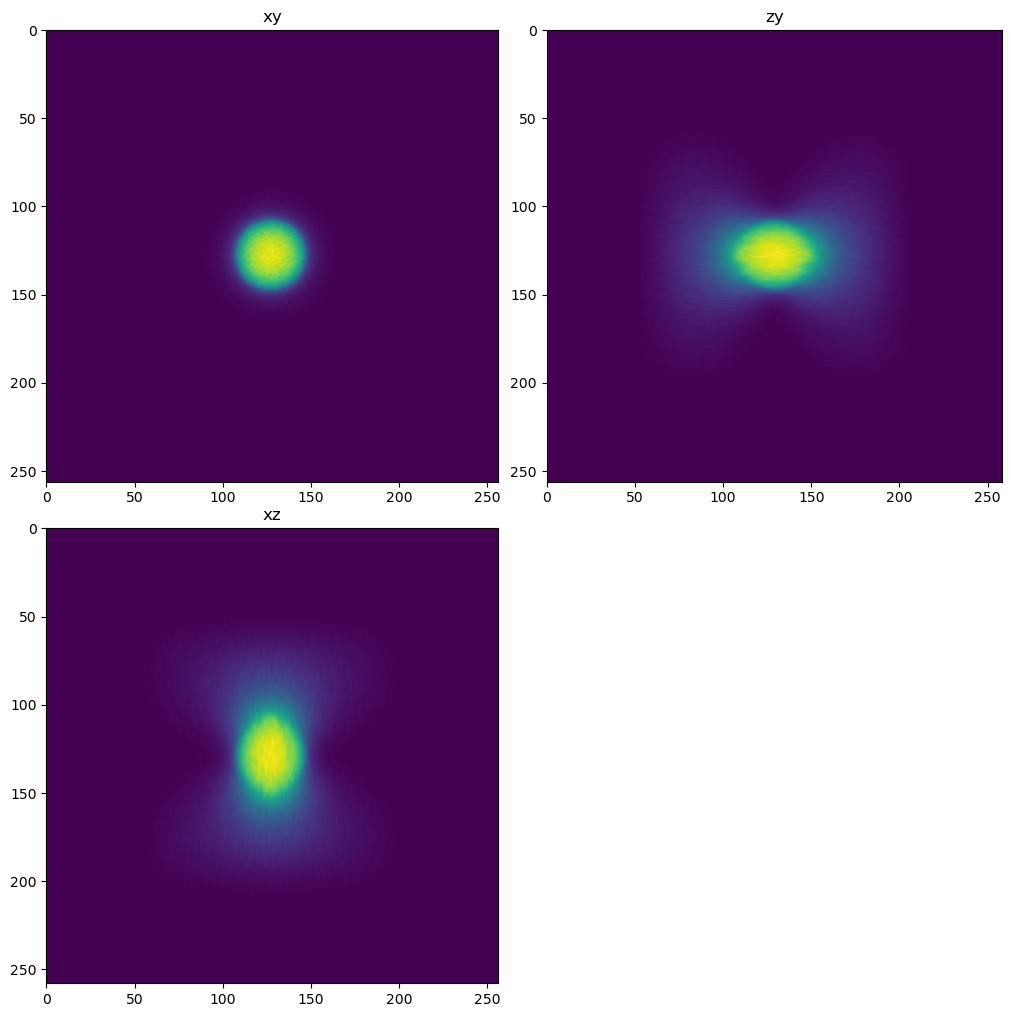

In [32]:
im = forward(phantom, psf, background, True, True)

x_v = im.shape[2]//2
y_v = im.shape[1]//2
z_v = im.shape[0]//2

phantom=phantom+background

fig = show_xyz_slice(im, x_v, y_v, z_v, sxy=sxy, sz=sz)

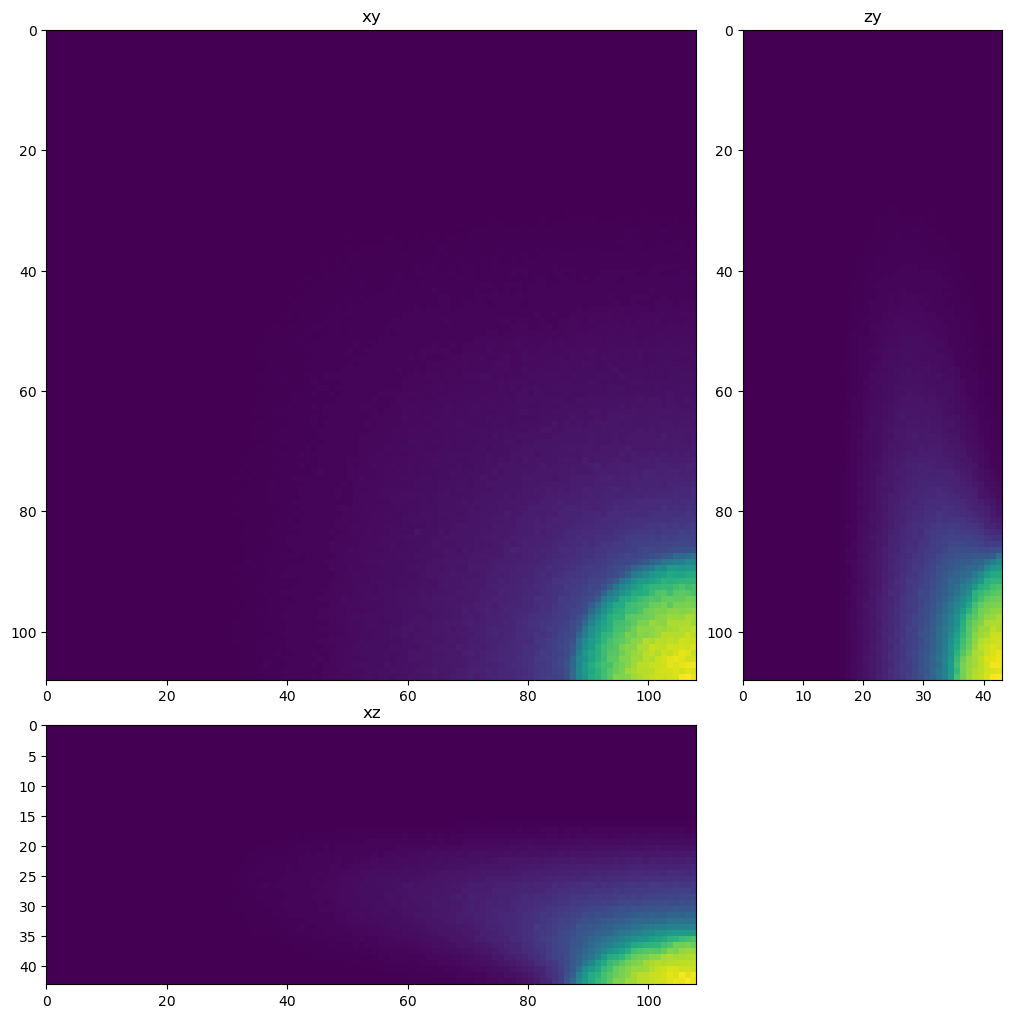

In [33]:
cropped = im[:im.shape[0]//2,20:im.shape[1]//2,20:im.shape[2]//2]
fig = show_xyz_max(cropped)

In [34]:
cropped.shape, psf.shape

((43, 108, 108), (43, 128, 128))

In [ ]:
from skimage.io import imsave

